In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv('')

In [3]:
df_train['entity'].unique()

array(['NBA2K', 'GrandTheftAuto(GTA)', 'TomClancysRainbowSix', 'CS-GO',
       'ApexLegends', 'MaddenNFL', 'TomClancysGhostRecon', 'Borderlands',
       'Hearthstone', 'RedDeadRedemption(RDR)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'Amazon', 'Xbox(Xseries)',
       'Microsoft', 'PlayStation5(PS5)', 'Verizon', 'Overwatch', 'Nvidia',
       'CallOfDutyBlackopsColdWar', 'Facebook', 'johnson&johnson',
       'HomeDepot', 'Battlefield', 'FIFA', 'Cyberpunk2077', 'CallOfDuty',
       'Fortnite', 'LeagueOfLegends', 'Dota2', 'Google', 'AssassinsCreed',
       'WorldOfCraft'], dtype=object)

<Axes: xlabel='entity'>

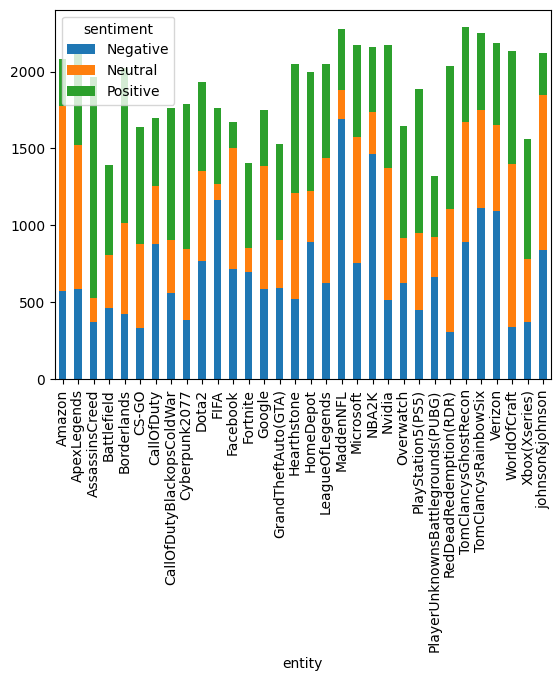

In [4]:
df_train.groupby(['entity', 'sentiment']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='sentiment'>

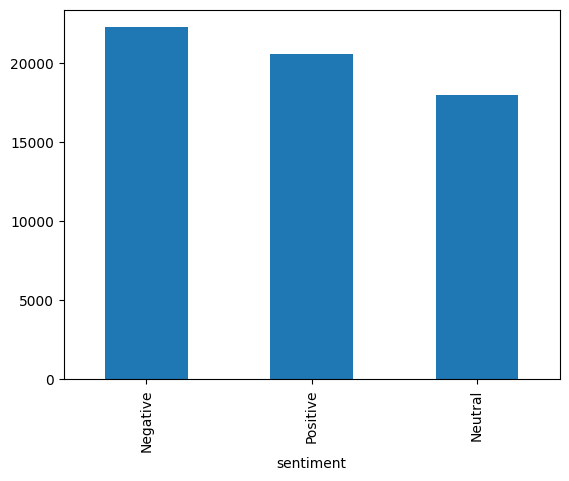

In [5]:
df_train['sentiment'].value_counts().plot(kind='bar')

In [10]:
pd.crosstab(df_train['sentiment'], df_train['label'])

label,0,1,2
sentiment,,,
Negative,22269,0,0
Neutral,0,17993,0
Positive,0,0,20587


<Axes: xlabel='post_length', ylabel='Count'>

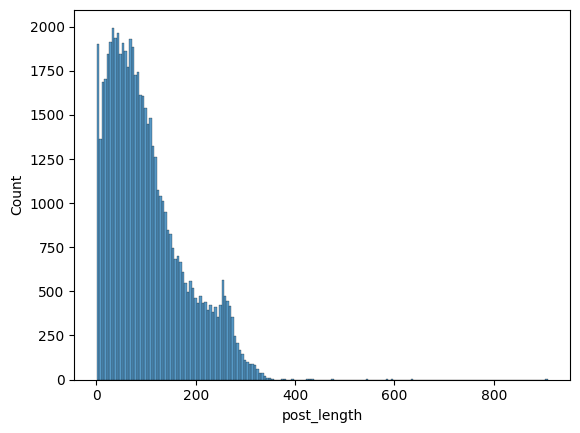

In [14]:
df_train['post_length'] = df_train['post'].apply(len)
sns.histplot(df_train['post_length'])

C:\Users\yura0\AppData\Local\Temp\ipykernel_19100\2631107676.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=freq_df, palette='viridis')


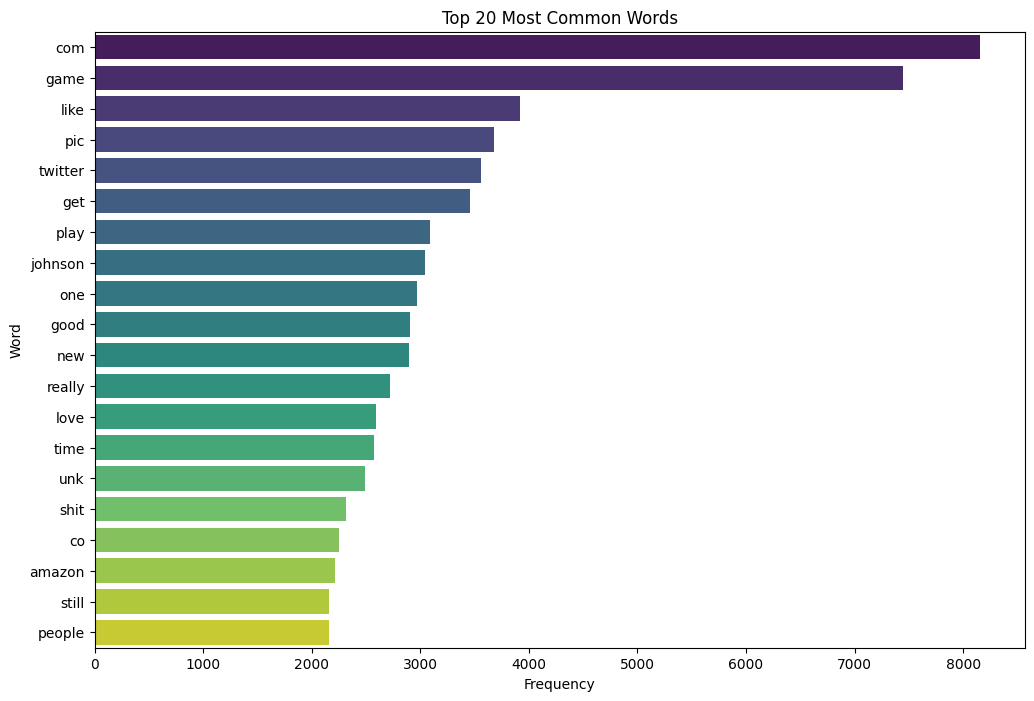

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

all_words = ' '.join(df_train['post']).split()

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(all_words)


common_words = word_freq.most_common(20)  
freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=freq_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


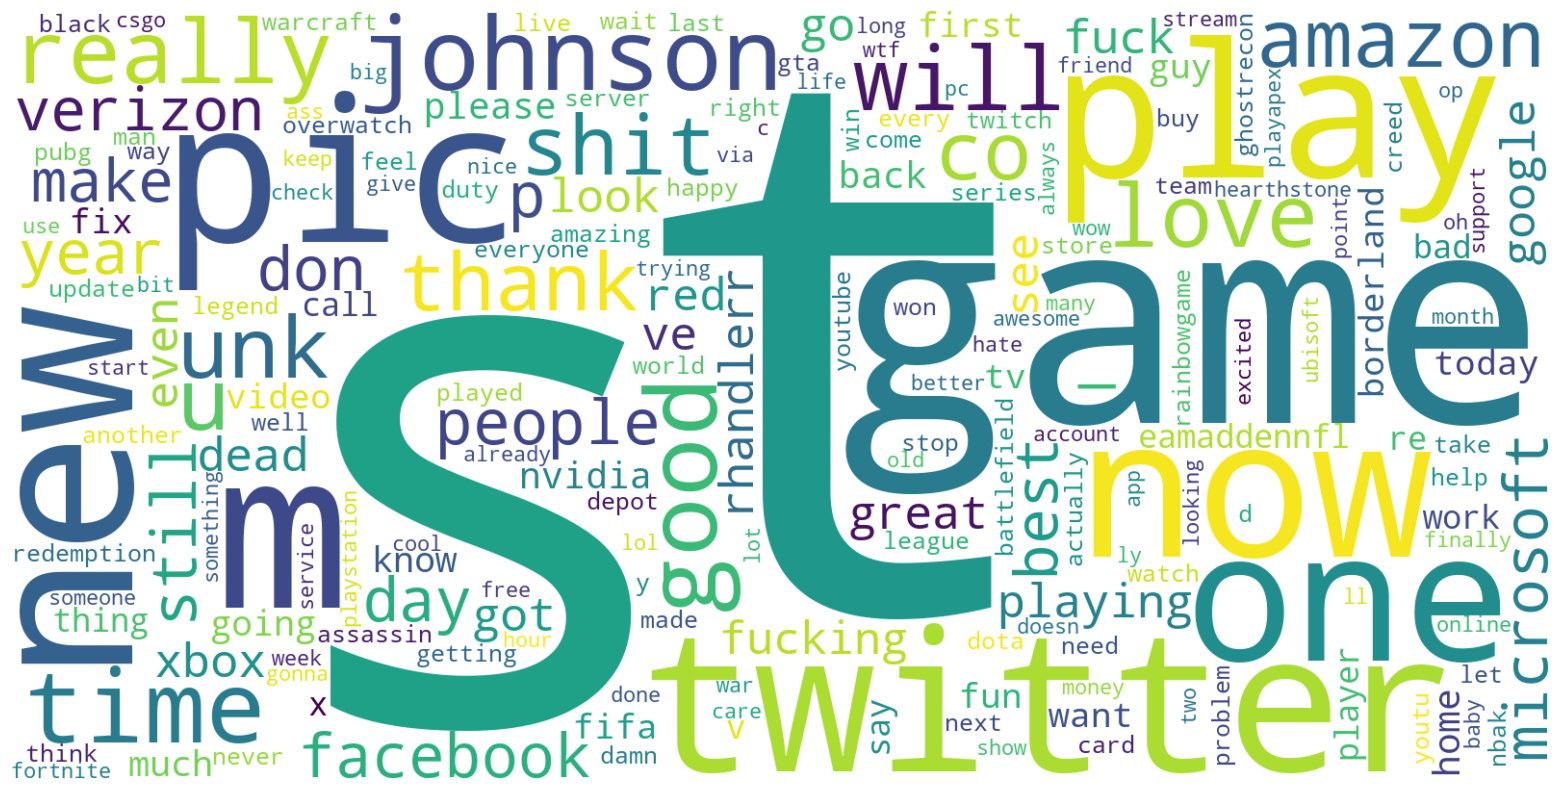

In [23]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_train['post'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=stopwords, collocations=False).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [26]:
pd.crosstab(df_train['entity'], df_train['sentiment'])

sentiment,Negative,Neutral,Positive
entity,,,
Amazon,575,1198,307
ApexLegends,588,932,632
AssassinsCreed,374,156,1437
Battlefield,461,348,584
Borderlands,426,588,1012
CS-GO,336,546,756
CallOfDuty,880,374,444
CallOfDutyBlackopsColdWar,560,346,854
Cyberpunk2077,384,460,946
